# Data Cleaning 

In [5]:
import pandas as pd
import numpy as np
import os
pd.options.display.max_rows = 4000

# Video Dataset from Kaggle (Trending)

In [ ]:
df = pd.read_csv(r'C:\Users\LEGION\Desktop\MMU\Data Science Fundamental\Project\Prediction of Video\dataset\US_youtube_trending_data.csv')

In [ ]:
df.shape

(195990, 16)

In [ ]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [ ]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [ ]:
df.dtypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

In [ ]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,195990.000000,1.959900e+05,1.959900e+05,195990.000000,1.959900e+05
mean,18.807720,2.498657e+06,1.293927e+05,1555.584698,1.077568e+04
std,6.759202,7.064335e+06,4.076709e+05,9389.205433,8.174297e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,17.000000,4.784200e+05,1.858800e+04,0.000000,1.328000e+03
50%,20.000000,9.659445e+05,4.272550e+04,24.500000,2.934000e+03
75%,24.000000,2.162866e+06,1.063425e+05,859.000000,6.920000e+03
max,29.000000,2.777917e+08,1.602153e+07,879354.000000,6.738537e+06


In [ ]:
df = df[['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
      'comment_count','description','thumbnail_link']].copy()


In [ ]:
df = df.rename(columns={'video_id' : 'videoID',
                   'trending_date':'trendingDate',
                   'view_count':'views',
                   'comment_count':'comments',
                   'thumbnail_link':'thumbnailLink'})

In [ ]:
df['trendingDate'] = pd.to_datetime(df['trendingDate'])
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

In [ ]:
df  = df.loc[~df.duplicated(subset=['videoID'],keep="last")].reset_index(drop=True).copy()
df.shape

(35719, 13)

In [ ]:
df = df[(df.likes != 0)& (df.comments != 0) & (df.views != 0)]

In [ ]:
#Inverse Mapping
df['description'] = df['description'].astype(object)

In [ ]:
df.channelId = df.channelId.astype("category")
df.channelTitle = df.channelTitle.astype("category")

In [ ]:
df.description = df.description.fillna('No description')

In [ ]:
df.isna().sum()

videoID          0
title            0
publishedAt      0
channelId        0
channelTitle     0
categoryId       0
trendingDate     0
tags             0
views            0
likes            0
comments         0
description      0
thumbnailLink    0
dtype: int64

# Video Dataset from Web Scrapping using Youtube Api 

In [ ]:
df2 = pd.read_csv(r'C:\Users\LEGION\Desktop\MMU\Data Science Fundamental\Project\Prediction of Video\dataset\US_youtube_non_trending_data.csv')

In [ ]:
df2 = df2.rename(columns={'video_id' : 'videoID',
                   'view_count':'views',
                   'comment_count':'comments',
                   'thumbnail_link':'thumbnailLink'})

In [ ]:
df2['publishedAt'] = pd.to_datetime(df2['publishedAt'])

In [ ]:
df2.channelId = df2.channelId.astype("category")
df2.channelTitle = df2.channelTitle.astype("category")

In [ ]:
df2.description = df2.description.fillna('No description')

In [ ]:
df2  = df2.loc[~df2.duplicated(subset=['videoID'],keep="last")].reset_index(drop=True).copy()

In [ ]:
df2 = df2.dropna(subset=['likes','comments','views'])
df2 = df2[(df2.likes != 0)& (df2.comments != 0) & (df2.views != 0)]
# df2 = df2[df2.views <=  999999]
df2.tags = df2.tags.fillna('[None]')


In [ ]:
import pytz

cutoff_date = pd.Timestamp('2018-01-01', tz=pytz.utc)
df2 = df2[df2['publishedAt'] >= cutoff_date]


In [ ]:
df2.isna().sum()

videoID          0
title            0
publishedAt      0
channelId        0
channelTitle     0
categoryId       0
tags             0
views            0
likes            0
comments         0
thumbnailLink    0
description      0
dtype: int64

In [ ]:
df2.shape

(67912, 12)

# Save Both Data Set To CSV

In [ ]:
df.to_csv('US_youtube_cleaned_trending_data.csv')
df2.to_csv('US_youtube_cleaned_non_trending_data.csv')

# Data Integration
## Merge both dataset

In [26]:
df = pd.read_csv(r'C:\Users\LEGION\Desktop\MMU\Data Science Fundamental\Project\Prediction of Video\dataset\US_youtube_cleaned_trending_data.csv')
df2 = pd.read_csv(r'C:\Users\LEGION\Desktop\MMU\Data Science Fundamental\Project\Prediction of Video\dataset\US_youtube_cleaned_non_trending_data.csv')
# df2 = df2[~df2['videoID'].isin(df['videoID'])]
# df['trendingOrNot'] = 1
# df2['trendingOrNot'] = 0
trending = df.copy()
nonTrending = df2.copy()

common_cols = list(set(trending.columns).intersection(nonTrending.columns))

# Merge the two dataframes using only the common columns
merged_df = pd.merge(trending[common_cols], nonTrending[common_cols], how='outer')

In [27]:
merged_df.columns

Index(['likes', 'channelTitle', 'tags', 'duration', 'title', 'categoryId',
       'Unnamed: 0.4', 'comments', 'thumbnailLink', 'videoID', 'Unnamed: 0.2',
       'Unnamed: 0.1', 'publishedAt', 'Unnamed: 0.3', 'Unnamed: 0',
       'channelId', 'description', 'views'],
      dtype='object')

# Data Transformation

In [28]:
merged_df.drop_duplicates(subset='videoID', inplace=True)


In [29]:
merged_df = merged_df[(merged_df.duration != 0)]
merged_df = merged_df.dropna(subset=['description'])

In [30]:
avg_views = merged_df['views'].mean()
#Cast a wider net and capture a larger number of potentially trending videos
threshold = avg_views / 2
print("The threshold value is:", threshold)

The threshold value is: 477131.1783798947


In [31]:
merged_df['trendingOrNot'] = merged_df['views'].apply(lambda x: 1 if x >=  threshold else 0)
merged_df['trendingOrNot'].value_counts()

0    86588
1    34614
Name: trendingOrNot, dtype: int64

In [ ]:
trend = len(merged_df[merged_df['trendingOrNot']==1])
noTrend = len(merged_df[merged_df['trendingOrNot']==0])
pctOfTrend = trend/(trend+noTrend)
print("percentage of trend is", pctOfTrend*100)
pctOfNoTrend = 100 - pctOfTrend*100
print("percentage of no trend", pctOfNoTrend)

# Feature Adding

In [32]:
# Retrieve the day of the week and the day time for video published
merged_df['publishedAt'] = pd.to_datetime(merged_df['publishedAt'])

# create a frequency distribution of the words in the 'title' column

merged_df['dayOfWeek'] = merged_df['publishedAt'].dt.weekday
def getDaytime(x):
    if x.hour>4 and x.hour<=10:
        return "Morning"
    elif x.hour>10 and x.hour<=16:
        return "Afternoon"
    elif x.hour>16 and x.hour<=22:
        return "Evening"
    else:
        return "Night"

merged_df['daytime']=merged_df.publishedAt.apply(lambda x: getDaytime(x))


In [33]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
# Fit the encoder to the data
le.fit(merged_df['daytime'])
# Transform the data using the encoder
merged_df['daytime'] = le.transform(merged_df['daytime'])


# Fit the label encoder to your category ID data and transform it
# merged_df['categoryId'] = le.fit_transform(merged_df['categoryId'])


In [34]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def question_mark(title):
    if '?' in title: 
        return True
    else:
        return False

def exclamation_mark(title):
    if '!' in str(title): 
        return True
    else:
        return False
    
def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True
    
def countCapLetter(sentence):
    count = 0
    for letter in sentence:
        if letter.isupper():
            count += 1
    return count

def fullCapSentence(text):
    words = text.split()
    for word in words:
        if not word.isupper():
            return False
    return True


def getSentimentScore(title):
    return analyzer.polarity_scores(title)['compound']


In [35]:
merged_df['titleLength'] = merged_df['title'].apply(lambda x: len(x))
merged_df['descriptionLength'] = merged_df['description'].apply(lambda x: len(x))
merged_df['questionMark'] = merged_df['title'].apply(question_mark)
merged_df['exclamationMark'] = merged_df['title'].apply(exclamation_mark)
merged_df['fullCapCount'] = merged_df['title'].apply(countCapLetter)
merged_df['fullCapSentence'] = merged_df['title'].apply(fullCapSentence)
merged_df['sentimentScore'] = merged_df['title'].apply(getSentimentScore)


In [36]:

merged_df = merged_df[['videoID','title', 'publishedAt','channelId','channelTitle','categoryId', 'tags', 'views', 'likes', 'comments','descriptionLength',\
     'thumbnailLink', 'dayOfWeek','daytime','duration','titleLength','questionMark','exclamationMark','sentimentScore','fullCapSentence','fullCapCount','trendingOrNot']].copy()
new_order = ['videoID','title','publishedAt', 'channelId','channelTitle','categoryId', 'tags', 'views', 'likes', 'comments','descriptionLength',\
    'thumbnailLink', 'dayOfWeek','daytime','duration','titleLength','questionMark','exclamationMark','sentimentScore','fullCapSentence','fullCapCount','trendingOrNot']
merged_df = merged_df[new_order]

In [37]:
def Missing_Counts( Data, NoMissing=True ) : 
    missing = Data.isnull().sum()  
    
    if NoMissing==False :
        missing = missing[ missing>0 ]
        
    missing.sort_values( ascending=False, inplace=True )  
    Missing_Count = pd.DataFrame( { 'Column Name':missing.index, 'Missing Count':missing.values } ) 
    Missing_Count[ 'Percentage(%)' ] = Missing_Count['Missing Count'].apply( lambda x: '{:.2%}'.format(x/Data.shape[0] ))
    return  Missing_Count

Missing_Counts(merged_df)

,Column Name,Missing Count,Percentage(%)
0,videoID,0,0.00%
1,title,0,0.00%
2,fullCapCount,0,0.00%
3,fullCapSentence,0,0.00%
4,sentimentScore,0,0.00%
5,exclamationMark,0,0.00%
6,questionMark,0,0.00%
7,titleLength,0,0.00%
8,duration,0,0.00%
9,daytime,0,0.00%


In [38]:
merged_df.to_csv('merged.csv')

In [117]:
merged_df.columns

Index(['videoID', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'tags', 'views', 'likes', 'comments', 'descriptionLength',
       'thumbnailLink', 'dayOfWeek', 'daytime', 'duration', 'titleLength',
       'questionMark', 'exclamationMark', 'sentimentScore', 'fullCapSentence',
       'fullCapCount', 'trendingOrNot', 'cleanTitle', 'commonWordCount'],
      dtype='object')

In [113]:
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter


stop_words = set(stopwords.words('english'))  # set of English stop words
lemmatizer = WordNetLemmatizer()
def preprocess(text,target_language='en'):
    if not isinstance(text, str):
        try:
            text = str(text)
        except:
            raise TypeError('Input must be a string or a float')
            
  
    # convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text) 
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Removing repeated characters
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    # Remove single character
    # words = [w for w in words if len(w) > 1]
    # tokenize the text
    words = word_tokenize(text)
    # remove non-English words
    # remove stop words
 

    words = [lemmatizer.lemmatize(w) for w in words]
    words = [w for w in words if not w in stop_words]
    
    return words

# Applying preprocessing function to title column
merged_df['cleanTitle'] = merged_df['title'].apply(preprocess)


# Filter the dataset for trending videos
trending_videos = merged_df[merged_df['trendingOrNot'] == 1]

# Tokenize and count words in trending video titles
word_counts = Counter()

for title in trending_videos['cleanTitle']:
    word_counts.update(title)

# Get the top 500 most common words
top_500_words = word_counts.most_common(500)

In [114]:
common_word_counts = []

# Iterate over each row in the DataFrame
for index, row in merged_df.iterrows():
    # Count the occurrences of common words in the cleanTitle
    count = sum(row['cleanTitle'].count(word) for word, _ in top_500_words)
    # Append the count to the common_word_counts list
    common_word_counts.append(count)

# Create a new column 'commonWordCount' in the DataFrame
merged_df['commonWordCount'] = common_word_counts


<AxesSubplot:>

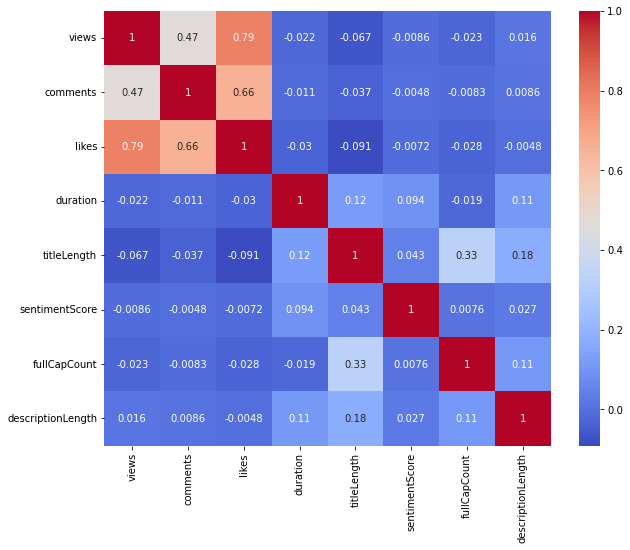

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
cols = ['views','comments','likes','duration', 'titleLength', 'sentimentScore', 'fullCapCount','descriptionLength']
corr_matrix = merged_df[cols].corr()

corr_matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',ax=ax)

In [ ]:
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))  # set of English stop words

def preprocess(text):
    if not isinstance(text, str):
        try:
            text = str(text)
        except:
            raise TypeError('Input must be a string or a float')
            
  
    # convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # tokenize the text
    words = word_tokenize(text)
    # remove stop words
    words = [w for w in words if not w in stop_words]
    
    return words

title_words = df['title'].apply(preprocess)
tags_words = df['tags'].apply(preprocess)
from nltk.probability import FreqDist

# create a frequency distribution of the words in the 'title' column
title_freq = FreqDist([word.lower() for words in title_words for word in words])
tags_freq = FreqDist([word.lower() for words in tags_words for word in words])

In [ ]:
from nltk.probability import FreqDist

# create a frequency distribution of the words in the 'title' column
title_freq = FreqDist([word.lower() for words in title_words for word in words])
tags_freq = FreqDist([word.lower() for words in tags_words for word in words])

import matplotlib.pyplot as plt

# create a bar chart of the top 20 words
top_words = title_freq.most_common(20)
words, counts = zip(*top_words)
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.show()

top_words = tags_freq.most_common(20)
words, counts = zip(*top_words)
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.show()

In [58]:
def extract_keyword(title):
    words = word_tokenize(title)
    keywords = [word for word in words if word.lower() in title_freq]
    if len(keywords) > 0:
        return max(keywords, key=lambda word: title_freq[word.lower()])
    else:
        return None
    
df['titleKeyword'] = df['title'].apply(extract_keyword)


NameError: name 'word_tokenize' is not defined

In [ ]:
title_freq_df = pd.DataFrame(list(title_freq.items()), columns=['word', 'frequency'])

# sort the DataFrame by frequency in descending order
title_freq_df = title_freq_df.sort_values(by='frequency', ascending=False)

# reset the index of the DataFrame
title_freq_df = title_freq_df.reset_index(drop=True)